In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/gurgaon_properties_missing_value_imputation.csv')
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [4]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [5]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [6]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


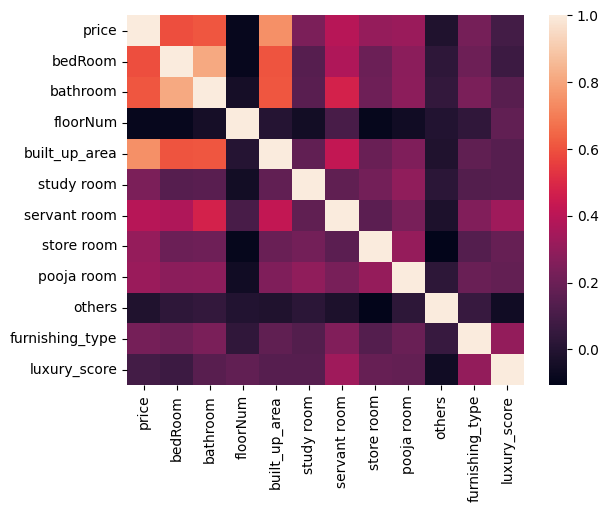

In [7]:
sns.heatmap(train_df.corr(numeric_only=True))
plt.show()

In [8]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [9]:
train_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

# Columns in question for feature selection
Already Good (Numeric Columns) : built_up_area, bathroom, bedRoom,   servant room ,  pooja room, store room , study room 
            
Not Sure (Numeric Columns): furnishing_type, luxury_score, others, floorNum
Not Sure (Categorical Columns): property_type, sector, balcony, agePossession

luxury_score into categorical variable

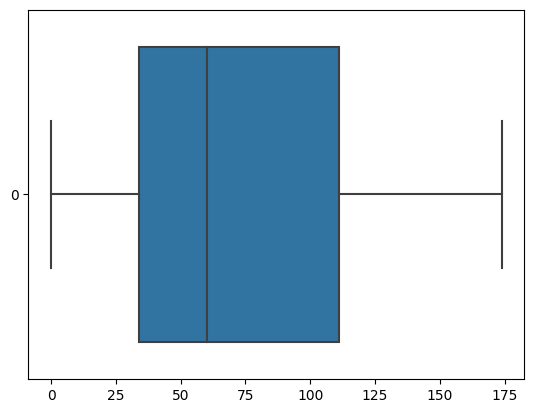

In [10]:
sns.boxplot(train_df['luxury_score'], orient='h')
plt.show()

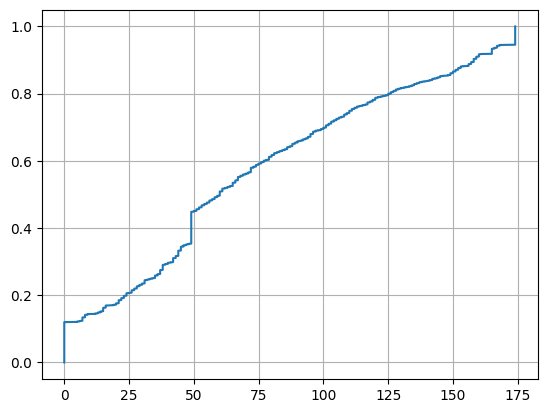

In [11]:
data = train_df['luxury_score']

x = np.sort(data)
# Calculate the CDF values
y = np.arange(len(data)) / float(len(data))

plt.plot(x,y)
plt.grid(True)
plt.show()

In [12]:
def luxury_category(luxury):
    if 0 <= luxury <50:
        return 'Low'
    elif 50 <= luxury <150:
        return 'Medium'
    elif 150 <= luxury <=175:
        return 'Hight'
    else:
        return None

In [13]:
train_df['luxury_category'] = train_df['luxury_score'].apply(luxury_category)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,Hight
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,Hight


floorNum into categorical variable

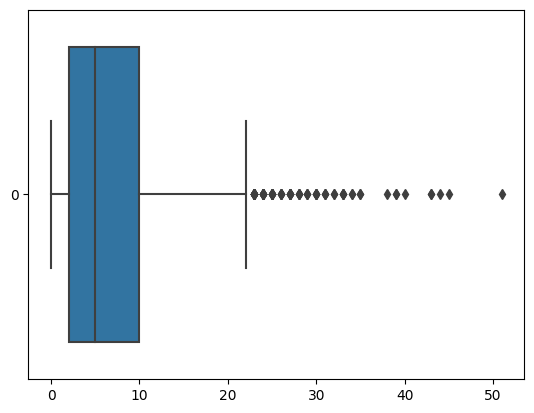

In [15]:
sns.boxplot(train_df['floorNum'], orient='h')
plt.show()

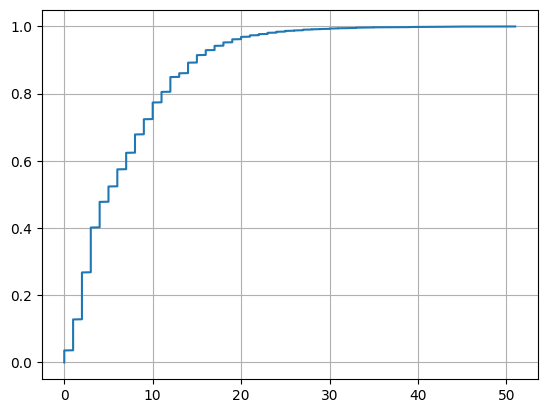

In [16]:
data = train_df['floorNum']

x = np.sort(data)
# Calculate the CDF values
y = np.arange(len(data)) / float(len(data))

plt.plot(x,y)
plt.grid(True)
plt.show()

In [17]:
def floor_category(luxury):
    if 0 <= luxury <=2:
        return 'Low Floor'
    elif 3 <= luxury <=10:
        return 'Med Floor'
    elif 11 <= luxury <=51:
        return 'Hight Floor'
    else:
        return None

In [18]:
train_df['floor_category'] = train_df['floorNum'].apply(floor_category)

In [19]:
train_df.drop(columns=['floorNum', 'luxury_score'], inplace=True)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Med Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Hight Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,Hight,Med Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,Hight,Med Floor


In [20]:
from sklearn.preprocessing import OrdinalEncoder
# keep a backup of data
data_label_encoded = train_df.copy()

# select dataframes slice with specified data types
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])

In [21]:
data_label_encoded.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,0.82,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,101.0,0.95,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,111.0,0.32,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,105.0,1.60,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,4.0,0.48,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [22]:
X_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']

In [23]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,101.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,111.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,105.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,4.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


Feature Selection Techniques

# Technique 1 : Correlation Analysis

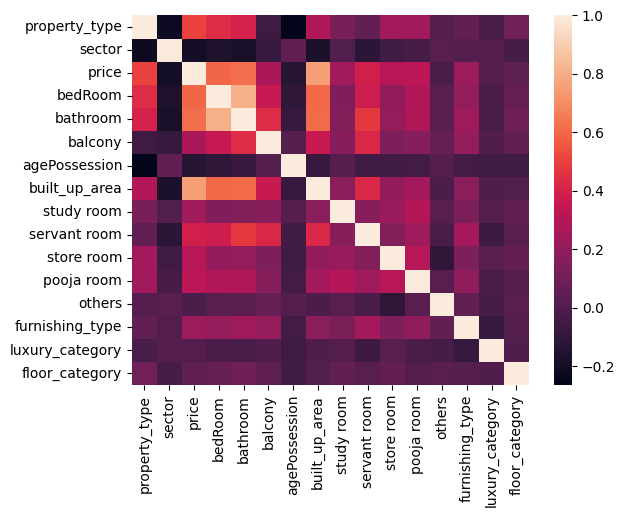

In [24]:
sns.heatmap(data_label_encoded.corr())
plt.show()

In [25]:
fi_df1 = data_label_encoded.corr()['price'].to_frame().reset_index().rename(columns={'index':'feature', 'price':'corr_coeff'})
#fi_df1 = fi_df1.sort_values(by='feature', ascending=True)
fi_df1

,feature,corr_coeff
0,property_type,0.503728
1,sector,-0.201678
2,price,1.000000
3,bedRoom,0.591289
4,bathroom,0.609777
5,balcony,0.269637
6,agePossession,-0.132989
7,built_up_area,0.748574
8,study room,0.242955
9,servant room,0.391930


# Technique 2 : Random Forest Feature Importance

In [26]:
from sklearn.ensemble import RandomForestRegressor
# train randomforestregressor on ;abel encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

#extract feature importance score for label encoded data
fi_df2 = pd.DataFrame({
    'feature':X_label.columns, 
    'rf_importance':rf_label.feature_importances_
    }).sort_values(by='rf_importance', ascending=False)
fi_df2


,feature,rf_importance
6,built_up_area,0.649693
1,sector,0.103220
0,property_type,0.100032
3,bathroom,0.026418
2,bedRoom,0.023452
8,servant room,0.018947
5,agePossession,0.013588
4,balcony,0.013013
12,furnishing_type,0.010644
7,study room,0.008607


# Technique 3 : Gradient Boosting Feature Importance

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
# train randomforestregressor on ;abel encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

#extract feature importance score for label encoded data
fi_df3 = pd.DataFrame({
    'feature':X_label.columns, 
    'gb_importance':gb_label.feature_importances_
    }).sort_values(by='gb_importance', ascending=False)
fi_df3

,feature,gb_importance
6,built_up_area,0.683149
1,sector,0.101452
0,property_type,0.096303
2,bedRoom,0.038015
3,bathroom,0.035268
8,servant room,0.022147
9,store room,0.009539
5,agePossession,0.005625
7,study room,0.003911
12,furnishing_type,0.002240


# Technique 4 : Permutation Importance

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#import permutation label
from sklearn.inspection import permutation_importance

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# train RandomForestRegressor on train data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# calculate permutation importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# organize feature importance in a dataframe
fi_df4 = pd.DataFrame({
    'feature':X_test_label.columns,
    'permutation_importance':perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4


,feature,permutation_importance
6,built_up_area,0.728231
0,property_type,0.206285
1,sector,0.174913
8,servant room,0.023002
2,bedRoom,0.020861
3,bathroom,0.017976
5,agePossession,0.005804
4,balcony,0.001919
9,store room,0.000887
14,floor_category,0.000796


# Technique 5 : LASSO

In [39]:
# LASSO is linear regression technique hence it will be very nreliable in this case
# reason is that for 4 of the categories we have coded them using Ordinal coding. 
# Their number will play important role in feature importance however it should not.
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# standardize all data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# use LASSO with small value of alpha
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coef': lasso.coef_
}).sort_values(by='lasso_coef', ascending=False)
fi_df5

,feature,lasso_coef
6,built_up_area,1.511257
0,property_type,0.717004
3,bathroom,0.275716
9,store room,0.199450
7,study room,0.171245
12,furnishing_type,0.163756
8,servant room,0.161327
10,pooja room,0.073260
13,luxury_category,0.055109
2,bedRoom,0.013999


# Technique 6 : RFE
this is one of the most effective deature selection technique

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# initial the base estimator
estimator = RandomForestRegressor()
# Apply RFE on label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# extract coefficients from the extracted features from the RandomForestRegressor estimator model
importance = selector_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': importance
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.653014
1,sector,0.102247
0,property_type,0.099878
3,bathroom,0.024883
2,bedRoom,0.023535
8,servant room,0.021353
5,agePossession,0.013607
4,balcony,0.013127
12,furnishing_type,0.009898
9,store room,0.008987


# Technique 7 : LinearRegressionModel
Not so reliable because we are using Ordinal Encoding for categorical data

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, test_size=0.02, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

lin_reg.coef_
fi_df7 = pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs':lin_reg.coef_ 
}).sort_values(by='reg_coeffs', ascending=False)
fi_df7

,feature,reg_coeffs
6,built_up_area,1.513777
0,property_type,0.717085
3,bathroom,0.282324
9,store room,0.203905
7,study room,0.179239
12,furnishing_type,0.173016
8,servant room,0.170536
10,pooja room,0.076263
13,luxury_category,0.066554
2,bedRoom,0.016762


# Technique 8 : SHAP

In [67]:
import shap
from sklearn.ensemble import RandomForestRegressor

# compute SHAp value using trained Random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

# calculate shap values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the abso;ute shap values across the all samples to get overall importance value
shap_sum = np.abs(shap_values).mean(axis=0)
shap_values

array([[-0.18136606,  0.11655694, -0.02934191, ..., -0.01232939,
        -0.00291872, -0.01023764],
       [-0.19758336, -0.39707848, -0.04884739, ..., -0.01121814,
        -0.00372479, -0.00447118],
       [-0.17618706, -0.42807202, -0.04537177, ..., -0.0144657 ,
        -0.01225289, -0.01762233],
       ...,
       [-0.18182115,  0.06560804, -0.01280648, ...,  0.00735695,
         0.01623708, -0.00354547],
       [ 1.50021614,  0.98379505,  0.35813064, ...,  0.06877779,
         0.0370676 ,  0.03834931],
       [-0.31855995,  0.01822783, -0.02372767, ...,  0.00628679,
        -0.00438299,  0.03958729]])

In [71]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

In [111]:
final_fi_df = fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature')
final_fi_df = final_fi_df.merge(fi_df4, on='feature').merge(fi_df5, on='feature')
final_df = final_fi_df.merge(fi_df6, on='feature').merge(fi_df7, on='feature').merge(fi_df8, on='feature')
final_df.set_index('feature')

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coef,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.503728,0.100032,0.096303,0.206285,0.717004,0.099878,0.717085,0.472616
sector,-0.201678,0.103220,0.101452,0.174913,-0.056443,0.102247,-0.065477,0.384240
bedRoom,0.591289,0.023452,0.038015,0.020861,0.013999,0.023535,0.016762,0.051355
bathroom,0.609777,0.026418,0.035268,0.017976,0.275716,0.024883,0.282324,0.112233
balcony,0.269637,0.013013,0.001513,0.001919,-0.042588,0.013127,-0.065336,0.041324
agePossession,-0.132989,0.013588,0.005625,0.005804,-0.000000,0.013607,0.001371,0.026518
built_up_area,0.748574,0.649693,0.683149,0.728231,1.511257,0.653014,1.513777,1.252572
study room,0.242955,0.008607,0.003911,-0.019154,0.171245,0.008167,0.179239,0.019524
servant room,0.391930,0.018947,0.022147,0.023002,0.161327,0.021353,0.170536,0.094383


In [123]:
norm_final_df = final_df.set_index('feature') / final_df.set_index('feature').sum()
norm_final_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coef,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.128704,0.100032,0.096303,0.179265,0.222439,0.099878,0.221903,0.184676
sector,-0.051529,0.103220,0.101452,0.152002,-0.017511,0.102247,-0.020262,0.150143
bedRoom,0.151076,0.023452,0.038015,0.018128,0.004343,0.023535,0.005187,0.020067
bathroom,0.155800,0.026418,0.035268,0.015621,0.085537,0.024883,0.087366,0.043855
balcony,0.068893,0.013013,0.001513,0.001668,-0.013212,0.013127,-0.020218,0.016147
agePossession,-0.033979,0.013588,0.005625,0.005044,-0.000000,0.013607,0.000424,0.010362
built_up_area,0.191263,0.649693,0.683149,0.632845,0.468844,0.653014,0.468441,0.489445
study room,0.062076,0.008607,0.003911,-0.016645,0.053126,0.008167,0.055466,0.007629
servant room,0.100139,0.018947,0.022147,0.019989,0.050049,0.021353,0.052773,0.036880


In [133]:
# use normalized importance and sum them. sort them
# let us take only correct values. i.e.Ignoring linear models
norm_final_df[['rf_importance', 'gb_importance', 'permutation_importance', 'rfe_score', 'SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.621629
property_type      0.132031
sector             0.121813
bathroom           0.029209
bedRoom            0.024639
servant room       0.023863
agePossession      0.009645
balcony            0.009094
store room         0.006945
furnishing_type    0.005080
floor_category     0.004830
luxury_category    0.004090
pooja room         0.002962
study room         0.002334
others             0.001835
dtype: float64

In [ ]:
# planning to remove 3 columns i.e. 
# pooja room, study room, others

# we will need to justify that it will not have any adverse impact on the model development


planning to remove 3 columns i.e. : pooja room, study room, others

we will need to justify that it will not have any adverse impact on the model development


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
score = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
print("Score with all the features = ", score.mean())

0.8208978305978032

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
score = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
print("Score with 3 least important features removed. = ", score.mean())

0.8206318519437048

In [136]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label
export_df.to_csv('./data/gugraon_properties_post_feature_selection.csv', index=False)